Library

In [ ]:
import numpy as np                                   #numpy used for working with arrays
import pandas as pd                                  #Data frame
import matplotlib.pyplot as plt                      #Plot & Graph
import seaborn as sns                                #Plot & Graph
from sklearn.model_selection import train_test_split #Data Split
from sklearn.ensemble import RandomForestRegressor   #Model
from sklearn import metrics                          #Finding Results

In [ ]:
gold_data = pd.read_csv('/content/drive/MyDrive/Projects/gld_price_data.csv')

In [ ]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


1. Date > Time of Collecting Data
2. SPX > Stock Values
3. GLD > Gold Price
4. USO > United State Oil Price
5. SLV > Silver Price Values
6. EUR/USD > Currency Pair

In [8]:
gold_data.shape                                #Size of Data in the Table

(2290, 6)

In [7]:
gold_data.info()                               #Basic informations about the Data Table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
gold_data.isnull().sum()                    #Missing values check

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Statistical Measures of the Data

In [11]:
correlation = gold_data.corr()

Correlation of The Regretion which Colums are in Positive Correlation & which are in the Negative Correlation.

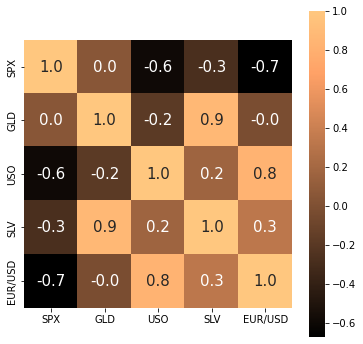

In [63]:
plt.figure(figsize = (6,6))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':15}, cmap='copper')

1. cbar > it will create a bar
2. fmt > how many numbers will show (1f = 1 float number will show)
3. annot > Numbers
4. annot_kws > declare the size of number
5. cmap > color of the map


    0 to +1 shows the Positive Corelations &  
    0 to -6 shows the Negative Corelations

In [35]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


Finding Correlation values of GLD

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


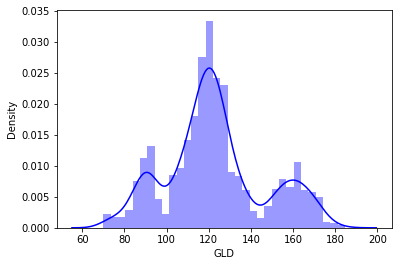

In [38]:
sns.distplot(gold_data['GLD'],color='Blue')

Checking the distribution of the GLD Price using Seaborn

In [39]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [40]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [41]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Data Trained & Data Tested

In [43]:
regressor = RandomForestRegressor(n_estimators=100)

Implement Random Forest Regressor

In [46]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [47]:
test_data_prediction = regressor.predict(X_test)

In [49]:
print(test_data_prediction)

[168.51009948  82.01749984 116.1239     127.61520091 120.64370137
 154.81669721 150.27739775 126.03630071 117.42879869 126.04030073
 116.81070117 171.65170056 141.64859795 167.90539939 115.30900023
 117.47410047 138.64740297 169.93220112 159.65120353 162.63319953
 155.0917997  125.17830029 176.25359853 156.97100374 125.2396003
  93.63329958  77.97180027 120.53279968 119.16229946 167.61630001
  88.14090035 125.43739996  91.12320065 117.62070011 121.10759961
 135.94350046 115.43990134 115.19730041 147.34899903 107.14750076
 104.21070224  87.29069798 126.53340071 117.9664997  154.91189915
 119.60370014 108.49380018 108.46989845  93.09080055 127.1323978
  74.81930036 113.74919936 121.63890009 111.29619907 118.72589871
 120.51119975 159.20780035 168.15220092 147.2565968   85.70749849
  94.42830045  86.86459868  90.4327001  118.97870085 126.35760052
 127.50960008 170.19500025 122.22929899 117.33319878  98.72560036
 168.78430238 143.18289816 132.10020239 121.12700226 120.8417995
 119.56150034

Showing The Predicted Values of X_Tested Data

In [50]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)      #Showing Error Score compared to main data

R squared error :  0.9898031648036043


Now Create a new Plot

In [51]:
Y_test = list(Y_test) #using pandas

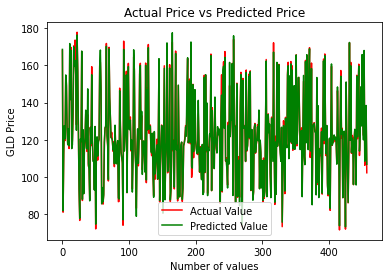

In [61]:
plt.title('Actual Price vs Predicted Price')
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.ylabel('GLD Price')
plt.xlabel('Number of values')
plt.legend() #Put a box where it will show the graphs Info
plt.show() #show the graph